# Import Libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import pathlib
import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split 
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import image
from keras.utils.np_utils import to_categorical
import pickle
from keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Dropout, Flatten,InputLayer
from keras.models import Sequential
from keras.layers.advanced_activations import LeakyReLU

# Uploading Dataset

In [2]:
data_path =r'/Users/mukhtaralbinhamad/Desktop/Deep_lernaing/smoke_data'
CATEGORIES = ['not_smoking','smoking'] 

In [3]:
training_data = []
IMG_SIZE=128

def trian_dataset():
    for category in CATEGORIES:
        path = os.path.join(data_path, category) 
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
trian_dataset()

In [5]:
print(len(training_data))

5551


# Shuflle data

In [6]:
import random
random.shuffle(training_data)
train_data, labels_data = zip(*training_data)

In [7]:
for Sample in training_data[:10]:
    print(Sample[1])

1
1
0
1
0
0
0
1
1
1


# Labeling

In [8]:
X=[]
y=[]
for features, label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X)# reshape
y = to_categorical(y, num_classes = 2)

In [9]:
X.shape,y.shape

((5551, 128, 128, 3), (5551, 2))

In [50]:
#pickle.dump(X, open('X.pkl', 'wb'))
#pickle.dump(y, open('y.pkl', 'wb'))

# Visualization

In [10]:
def display_random_set(data, labels, classes):
    plt.figure(figsize=(15, 15))
    for i in range(10):
        plt.subplot(5, 5, (i+1))
        random_val = np.random.randint(low=0, high=len(data))
        img = data[random_val]
        plt.imshow(img)
        plt.axis(False)
        plt.title(classes[np.argmax(labels[random_val])])
    plt.show()

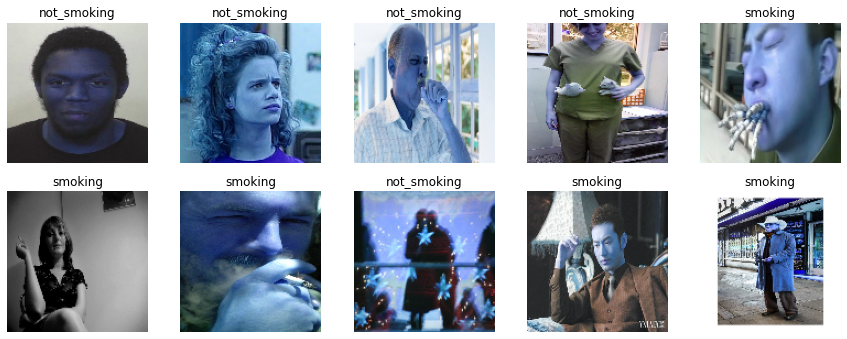

In [11]:
display_random_set(data=X, labels=y, classes=CATEGORIES)

# Split Data (Train - Validation)

In [9]:
#nsample,nx,ny,ni=X.shape #  ANNهذا نستخدمه لو بنطبق  
#X1=X.reshape(nsample,nx*ny*ni)
#print(X1.shape)

(2007, 49152)


In [12]:
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=.2, random_state=42)

# Starting with modeling

## 1- Convolutional Neural Networks (CNN)

In [13]:
#model = sequential() # الهندي.....

#model.add(Conv2D(64, (3,3), activation = 'relu' ))
#model.add(MaxPooling2D((2,2)))

#model.add(Conv2D(64, (3,3), activation = 'relu' ))
#model.add(MaxPooling2D((2,2)))

#model.add(Flatten())

#model.add(Dense(128, input_shape = X_train.shape[1:],activation = 'relu'))

#model.add(Dense(2, activation = 'softmax'))

In [14]:
#model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
#model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs=10) 

In [13]:
model = Sequential()

model.add(InputLayer(input_shape=(128, 128, 3)))

model.add(Conv2D(32, 3, activation='relu'))   
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, activation='relu'))   
model.add(MaxPooling2D())
model.add(Conv2D(32, 3, activation='relu'))  
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(2 , activation = 'softmax'))   

In [13]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy'])

In [14]:
M = model.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=10,batch_size=64)   

Epoch 1/10
70/70 [==============================] - 31s 440ms/step - loss: 6.0197 - accuracy: 0.6020 - val_loss: 0.6126 - val_accuracy: 0.6814
Epoch 2/10
70/70 [==============================] - 31s 450ms/step - loss: 0.5495 - accuracy: 0.7250 - val_loss: 0.5625 - val_accuracy: 0.7192
Epoch 3/10
70/70 [==============================] - 32s 455ms/step - loss: 0.4683 - accuracy: 0.7750 - val_loss: 0.5511 - val_accuracy: 0.7273
Epoch 4/10
70/70 [==============================] - 32s 455ms/step - loss: 0.4051 - accuracy: 0.8149 - val_loss: 0.6420 - val_accuracy: 0.7012
Epoch 5/10
70/70 [==============================] - 32s 455ms/step - loss: 0.3236 - accuracy: 0.8592 - val_loss: 0.5874 - val_accuracy: 0.7354
Epoch 6/10
70/70 [==============================] - 33s 472ms/step - loss: 0.2367 - accuracy: 0.9032 - val_loss: 0.5894 - val_accuracy: 0.7624
Epoch 7/10
70/70 [==============================] - 33s 466ms/step - loss: 0.1937 - accuracy: 0.9291 - val_loss: 0.6302 - val_accuracy: 0.7723

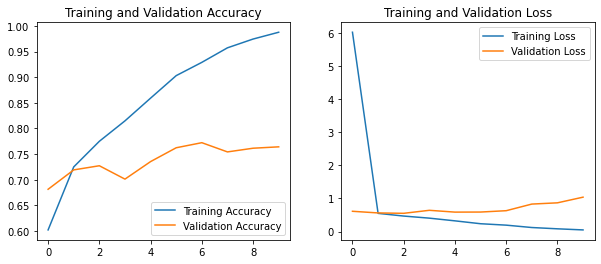

In [15]:
acc = M.history['accuracy']
val_acc = M.history['val_accuracy']

loss = M.history['loss']
val_loss = M.history['val_loss']

epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [16]:
model_1 = Sequential()
model_1.add(InputLayer(input_shape=(128, 128,3)))
model_1.add(Conv2D(32, 3, activation='relu'))   
model_1.add(MaxPooling2D())
model_1.add(Conv2D(64, 3, activation='relu'))   
model_1.add(MaxPooling2D())
model_1.add(Conv2D(128, 3, activation='relu'))    
model_1.add(MaxPooling2D())
model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))    
model_1.add(Dense(2 , activation = 'softmax'))  

In [17]:
model_1.compile(optimizer='adam', loss="categorical_crossentropy",  metrics=['accuracy'])

In [19]:
M_1= model_1.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=10,batch_size=64)


Epoch 1/10
70/70 [==============================] - 40s 565ms/step - loss: 16.0115 - accuracy: 0.6151 - val_loss: 0.6273 - val_accuracy: 0.6679
Epoch 2/10
70/70 [==============================] - 42s 599ms/step - loss: 0.6132 - accuracy: 0.6671 - val_loss: 0.5973 - val_accuracy: 0.6850
Epoch 3/10
70/70 [==============================] - 43s 620ms/step - loss: 0.5852 - accuracy: 0.6824 - val_loss: 0.5958 - val_accuracy: 0.6904
Epoch 4/10
70/70 [==============================] - 42s 595ms/step - loss: 0.5072 - accuracy: 0.7559 - val_loss: 0.5914 - val_accuracy: 0.7039
Epoch 5/10
70/70 [==============================] - 41s 591ms/step - loss: 0.3933 - accuracy: 0.8230 - val_loss: 0.6992 - val_accuracy: 0.7120
Epoch 6/10
70/70 [==============================] - 41s 583ms/step - loss: 0.2648 - accuracy: 0.8865 - val_loss: 0.6768 - val_accuracy: 0.7498
Epoch 7/10
70/70 [==============================] - 41s 582ms/step - loss: 0.1622 - accuracy: 0.9399 - val_loss: 0.7612 - val_accuracy: 0.754

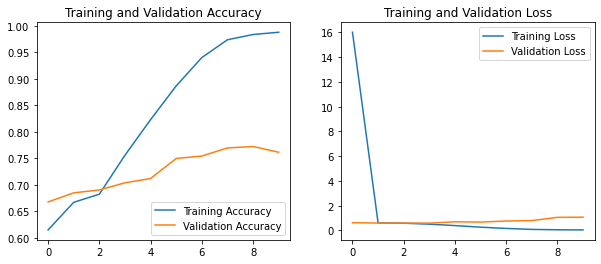

In [21]:
acc = M_1.history['accuracy']
val_acc = M_1.history['val_accuracy']

loss = M_1.history['loss']
val_loss = M_1.history['val_loss']

epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss');

In [26]:
model_2 = Sequential()
model_2.add(InputLayer(input_shape=(128, 128,3)))
model_2.add(Conv2D(32, 3, activation='relu'))   
model_2.add(MaxPooling2D())
model_2.add(Conv2D(64, 3, activation='relu'))   
model_2.add(MaxPooling2D())
model_2.add(Conv2D(128, 3, activation='relu'))    
model_2.add(MaxPooling2D())
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))  
model_2.add(Dense(128, activation='relu'))  
model_2.add(Dense(2 , activation = 'softmax'))  

In [27]:
model_2.compile(optimizer='adam', loss="categorical_crossentropy",  metrics=['accuracy'])

In [28]:
M_2= model_2.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=10,batch_size=64)

Epoch 1/10
70/70 [==============================] - 46s 654ms/step - loss: 9.0304 - accuracy: 0.6239 - val_loss: 0.6218 - val_accuracy: 0.6634
Epoch 2/10
70/70 [==============================] - 46s 658ms/step - loss: 0.5474 - accuracy: 0.7214 - val_loss: 0.6060 - val_accuracy: 0.7012
Epoch 3/10
70/70 [==============================] - 49s 701ms/step - loss: 0.4035 - accuracy: 0.8115 - val_loss: 0.6049 - val_accuracy: 0.7282
Epoch 4/10
70/70 [==============================] - 46s 656ms/step - loss: 0.2548 - accuracy: 0.8966 - val_loss: 0.7397 - val_accuracy: 0.7273
Epoch 5/10
70/70 [==============================] - 51s 730ms/step - loss: 0.1498 - accuracy: 0.9459 - val_loss: 0.9406 - val_accuracy: 0.7453
Epoch 6/10
70/70 [==============================] - 46s 661ms/step - loss: 0.1180 - accuracy: 0.9637 - val_loss: 1.0317 - val_accuracy: 0.7624
Epoch 7/10
70/70 [==============================] - 47s 674ms/step - loss: 0.0588 - accuracy: 0.9806 - val_loss: 1.2207 - val_accuracy: 0.7579

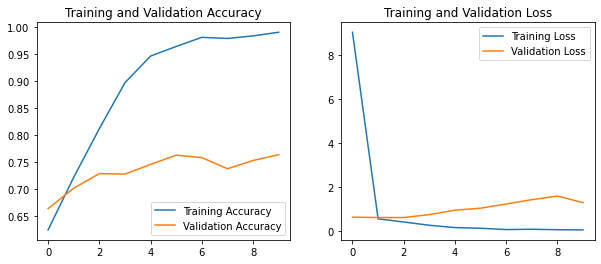

In [29]:
acc = M_2.history['accuracy']
val_acc = M_2.history['val_accuracy']

loss = M_2.history['loss']
val_loss = M_2.history['val_loss']

epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss');

In [32]:
model_3 = Sequential()

model_3.add(InputLayer(input_shape=(128, 128,3)))

model_3.add(Conv2D(32, 3, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))    
model_3.add(MaxPooling2D())

model_3.add(Conv2D(64, 3, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))   
model_3.add(MaxPooling2D())

model_3.add(Conv2D(128, 3, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))    
model_3.add(MaxPooling2D())

model_3.add(Flatten())
model_3.add(Dense(512, activation='relu',kernel_regularizer=keras.regularizers.l2(0.001)))     
model_3.add(Dense(2 , activation = 'softmax'))  

In [33]:
model_3.compile(optimizer='adam', loss="categorical_crossentropy",  metrics=['accuracy'])

In [34]:
M_3=model_3.fit(X_train, y_train, validation_data=(X_val,y_val),epochs=10)


Epoch 1/10
139/139 [==============================] - 50s 360ms/step - loss: 20.5680 - accuracy: 0.6018 - val_loss: 1.5791 - val_accuracy: 0.6130
Epoch 2/10
139/139 [==============================] - 54s 389ms/step - loss: 1.4619 - accuracy: 0.6687 - val_loss: 1.4481 - val_accuracy: 0.6382
Epoch 3/10
139/139 [==============================] - 53s 383ms/step - loss: 1.3245 - accuracy: 0.7196 - val_loss: 1.4792 - val_accuracy: 0.6463
Epoch 4/10
139/139 [==============================] - 55s 394ms/step - loss: 1.2150 - accuracy: 0.7588 - val_loss: 1.4027 - val_accuracy: 0.6769
Epoch 5/10
139/139 [==============================] - 59s 427ms/step - loss: 1.0770 - accuracy: 0.8182 - val_loss: 1.4196 - val_accuracy: 0.7048
Epoch 6/10
139/139 [==============================] - 58s 418ms/step - loss: 1.0164 - accuracy: 0.8509 - val_loss: 1.4076 - val_accuracy: 0.7048
Epoch 7/10
139/139 [==============================] - 55s 398ms/step - loss: 1.0186 - accuracy: 0.8459 - val_loss: 1.5028 - val_a

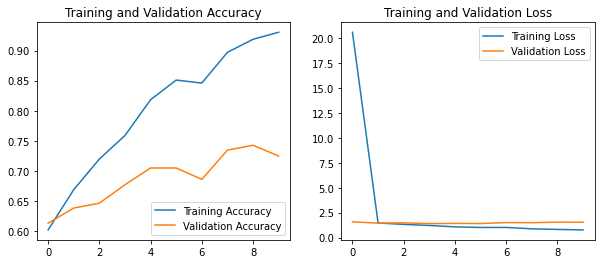

In [35]:
acc = M_3.history['accuracy']
val_acc = M_3.history['val_accuracy']

loss = M_3.history['loss']
val_loss = M_3.history['val_loss']

epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss');

In [43]:
model_4 = Sequential()
model_4.add(InputLayer(input_shape=(128, 128,3)))
model_4.add(Conv2D(32, 3, activation='relu'))    
model_4.add(MaxPooling2D())
model_4.add(Conv2D(64, 3, activation='relu'))   
model_4.add(MaxPooling2D())
model_4.add(Conv2D(128, 3, activation='relu'))    
model_4.add(MaxPooling2D())
model_4.add(Flatten())
model_4.add(Dense(512, activation='relu')) 
model_4.add(Dropout(.05))  
model_4.add(Dense(2 , activation = 'softmax'))  
model_4.compile(optimizer='Adagrad',loss="categorical_crossentropy",metrics=['accuracy'])

In [44]:
callbacks=keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,mode="auto",restore_best_weights=True)
M_4=model_4.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_val,y_val), callbacks=[callbacks])

Epoch 1/10
70/70 [==============================] - 42s 591ms/step - loss: 14.8425 - accuracy: 0.5908 - val_loss: 0.7176 - val_accuracy: 0.6103
Epoch 2/10
70/70 [==============================] - 42s 602ms/step - loss: 0.5911 - accuracy: 0.6836 - val_loss: 0.6895 - val_accuracy: 0.6292
Epoch 3/10
70/70 [==============================] - 42s 599ms/step - loss: 0.5515 - accuracy: 0.7124 - val_loss: 0.6006 - val_accuracy: 0.6904
Epoch 4/10
70/70 [==============================] - 42s 600ms/step - loss: 0.5142 - accuracy: 0.7435 - val_loss: 0.6553 - val_accuracy: 0.6508
Epoch 5/10
70/70 [==============================] - 42s 594ms/step - loss: 0.4776 - accuracy: 0.7694 - val_loss: 0.6125 - val_accuracy: 0.6913
Epoch 6/10
70/70 [==============================] - 42s 603ms/step - loss: 0.4418 - accuracy: 0.7858 - val_loss: 0.7077 - val_accuracy: 0.6616
Epoch 7/10
70/70 [==============================] - 42s 606ms/step - loss: 0.4260 - accuracy: 0.8020 - val_loss: 0.5927 - val_accuracy: 0.727

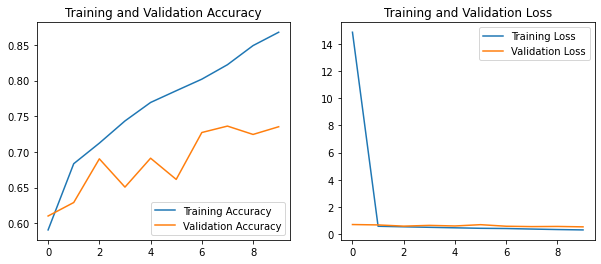

In [45]:
acc = M_4.history['accuracy']
val_acc = M_4.history['val_accuracy']

loss = M_4.history['loss']
val_loss = M_4.history['val_loss']

epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss');

In [14]:
model_5 = Sequential()
model_5.add(InputLayer(input_shape=(128, 128,3)))
model_5.add(Conv2D(32, 3, activation='relu'))    
model_5.add(MaxPooling2D())
model_5.add(Conv2D(64, 3, activation='relu'))   
model_5.add(MaxPooling2D())
model_5.add(Conv2D(128, 3, activation='relu'))    
model_5.add(MaxPooling2D())
model_5.add(Flatten())
model_5.add(Dense(512, activation='relu')) 
model_5.add(Dropout(.05))  
model_5.add(Dense(2 , activation = 'softmax'))  
model_5.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [15]:
callbacks=keras.callbacks.EarlyStopping(monitor='loss', patience=5,mode="auto",restore_best_weights=True)
M_5=model_5.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_val,y_val), callbacks=[callbacks])

Epoch 1/10
70/70 [==============================] - 41s 575ms/step - loss: 43.5286 - accuracy: 0.6041 - val_loss: 0.6152 - val_accuracy: 0.6814
Epoch 2/10
70/70 [==============================] - 42s 596ms/step - loss: 0.5446 - accuracy: 0.7223 - val_loss: 0.5765 - val_accuracy: 0.7129
Epoch 3/10
70/70 [==============================] - 42s 602ms/step - loss: 0.3822 - accuracy: 0.8245 - val_loss: 0.5962 - val_accuracy: 0.7282
Epoch 4/10
70/70 [==============================] - 44s 626ms/step - loss: 0.2372 - accuracy: 0.9077 - val_loss: 0.7200 - val_accuracy: 0.7363
Epoch 5/10
70/70 [==============================] - 41s 592ms/step - loss: 0.1419 - accuracy: 0.9516 - val_loss: 0.9919 - val_accuracy: 0.7372
Epoch 6/10
70/70 [==============================] - 41s 590ms/step - loss: 0.1033 - accuracy: 0.9655 - val_loss: 0.9519 - val_accuracy: 0.7480
Epoch 7/10
70/70 [==============================] - 41s 588ms/step - loss: 0.0589 - accuracy: 0.9831 - val_loss: 1.0350 - val_accuracy: 0.746

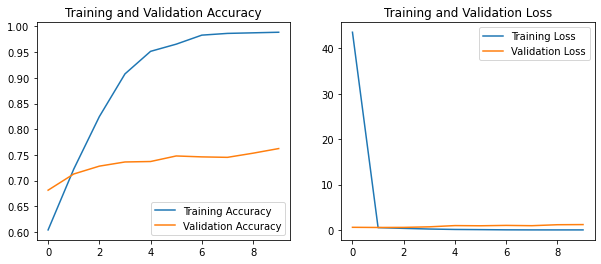

In [16]:
acc = M_5.history['accuracy']
val_acc = M_5.history['val_accuracy']

loss = M_5.history['loss']
val_loss = M_5.history['val_loss']

epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss');

In [17]:
model_6 = Sequential()
model_6.add(InputLayer(input_shape=(128, 128,3)))
model_6.add(Conv2D(32, 3, activation='relu'))    
model_6.add(MaxPooling2D())
model_6.add(Conv2D(64, 3, activation='relu'))   
model_6.add(MaxPooling2D())
model_6.add(Conv2D(128, 3, activation='relu'))    
model_6.add(MaxPooling2D())
model_6.add(Flatten())
model_6.add(Dense(512, activation='relu'))
model_6.add(Dense(512, activation='relu')) 
model_6.add(Dropout(.05))  
model_6.add(Dense(2 , activation = 'softmax'))  
model_6.compile(optimizer='Adagrad',loss="categorical_crossentropy",metrics=['accuracy'])

In [18]:
M_6=model_6.fit(X_train, y_train, batch_size=70, epochs=10, validation_data=(X_val,y_val))

Epoch 1/10
64/64 [==============================] - 42s 649ms/step - loss: 9.8303 - accuracy: 0.5872 - val_loss: 0.5938 - val_accuracy: 0.6652
Epoch 2/10
64/64 [==============================] - 42s 663ms/step - loss: 0.5796 - accuracy: 0.7054 - val_loss: 0.5842 - val_accuracy: 0.6778
Epoch 3/10
64/64 [==============================] - 42s 662ms/step - loss: 0.4409 - accuracy: 0.7962 - val_loss: 0.5838 - val_accuracy: 0.6985
Epoch 4/10
64/64 [==============================] - 42s 663ms/step - loss: 0.3531 - accuracy: 0.8509 - val_loss: 0.4986 - val_accuracy: 0.7507
Epoch 5/10
64/64 [==============================] - 42s 656ms/step - loss: 0.2811 - accuracy: 0.8930 - val_loss: 0.5152 - val_accuracy: 0.7498
Epoch 6/10
64/64 [==============================] - 42s 664ms/step - loss: 0.2320 - accuracy: 0.9230 - val_loss: 0.4973 - val_accuracy: 0.7723
Epoch 7/10
64/64 [==============================] - 42s 656ms/step - loss: 0.1849 - accuracy: 0.9484 - val_loss: 0.4897 - val_accuracy: 0.7813

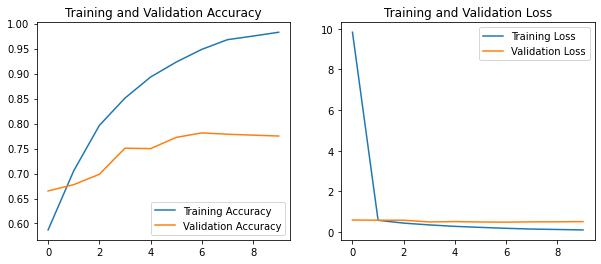

In [19]:
acc = M_6.history['accuracy']
val_acc = M_6.history['val_accuracy']

loss = M_6.history['loss']
val_loss = M_6.history['val_loss']

epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss');

In [20]:
model_7= Sequential()
model_7.add(InputLayer(input_shape=(128, 128,3)))
model_7.add(Conv2D(32, 3, activation='relu'))    
model_7.add(MaxPooling2D())
model_7.add(Conv2D(64, 3, activation='relu'))   
model_7.add(MaxPooling2D())
model_7.add(Conv2D(128, 3, activation='relu'))    
model_7.add(MaxPooling2D())
model_7.add(Flatten())
model_7.add(Dense(512, activation='relu'))
model_7.add(Dense(512, activation='relu')) 
model_7.add(Dense(2 , activation = 'sigmoid'))  
model_7.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [21]:
M_7=model_7.fit(X_train, y_train, batch_size=70, epochs=10, validation_data=(X_val,y_val))

Epoch 1/10
64/64 [==============================] - 42s 641ms/step - loss: 9.8938 - accuracy: 0.6209 - val_loss: 0.6311 - val_accuracy: 0.6661
Epoch 2/10
64/64 [==============================] - 42s 651ms/step - loss: 0.5726 - accuracy: 0.6982 - val_loss: 0.6570 - val_accuracy: 0.6661
Epoch 3/10
64/64 [==============================] - 42s 653ms/step - loss: 0.4489 - accuracy: 0.7876 - val_loss: 0.6908 - val_accuracy: 0.7237
Epoch 4/10
64/64 [==============================] - 49s 775ms/step - loss: 0.3020 - accuracy: 0.8696 - val_loss: 0.7033 - val_accuracy: 0.7444
Epoch 5/10
64/64 [==============================] - 46s 714ms/step - loss: 0.1688 - accuracy: 0.9331 - val_loss: 0.9571 - val_accuracy: 0.7201
Epoch 6/10
64/64 [==============================] - 42s 657ms/step - loss: 0.1422 - accuracy: 0.9507 - val_loss: 1.2801 - val_accuracy: 0.7390
Epoch 7/10
64/64 [==============================] - 42s 650ms/step - loss: 0.0885 - accuracy: 0.9678 - val_loss: 1.4329 - val_accuracy: 0.7552

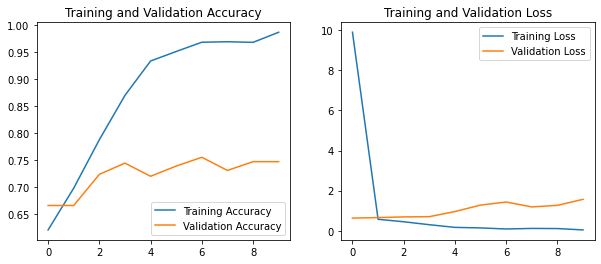

In [22]:
acc = M_7.history['accuracy']
val_acc = M_7.history['val_accuracy']

loss = M_7.history['loss']
val_loss = M_7.history['val_loss']

epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss');

In [23]:
model_8= Sequential()
model_8.add(InputLayer(input_shape=(128, 128,3)))
model_8.add(Conv2D(32, 3, activation='relu'))    
model_8.add(MaxPooling2D())
model_8.add(Conv2D(64, 3, activation='relu'))   
model_8.add(MaxPooling2D())
model_8.add(Conv2D(128, 3, activation='relu'))    
model_8.add(MaxPooling2D())
model_8.add(Flatten())
model_8.add(Dense(128, activation='relu'))
model_8.add(Dense(128, activation='relu')) 
model_8.add(Dense(2 , activation = 'softmax'))  
model_8.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [24]:
M_8=model_8.fit(X_train, y_train, batch_size=70, epochs=10, validation_data=(X_val,y_val))

Epoch 1/10
64/64 [==============================] - 40s 615ms/step - loss: 4.0080 - accuracy: 0.5957 - val_loss: 0.6283 - val_accuracy: 0.6346
Epoch 2/10
64/64 [==============================] - 46s 725ms/step - loss: 0.6008 - accuracy: 0.6500 - val_loss: 0.6592 - val_accuracy: 0.6598
Epoch 3/10
64/64 [==============================] - 45s 697ms/step - loss: 0.4898 - accuracy: 0.7664 - val_loss: 0.6119 - val_accuracy: 0.7030
Epoch 4/10
64/64 [==============================] - 42s 650ms/step - loss: 0.3522 - accuracy: 0.8471 - val_loss: 0.6665 - val_accuracy: 0.7147
Epoch 5/10
64/64 [==============================] - 43s 667ms/step - loss: 0.2172 - accuracy: 0.9101 - val_loss: 0.8620 - val_accuracy: 0.7147
Epoch 6/10
64/64 [==============================] - 42s 656ms/step - loss: 0.1567 - accuracy: 0.9439 - val_loss: 0.9010 - val_accuracy: 0.7354
Epoch 7/10
64/64 [==============================] - 40s 627ms/step - loss: 0.1103 - accuracy: 0.9568 - val_loss: 1.3015 - val_accuracy: 0.7300

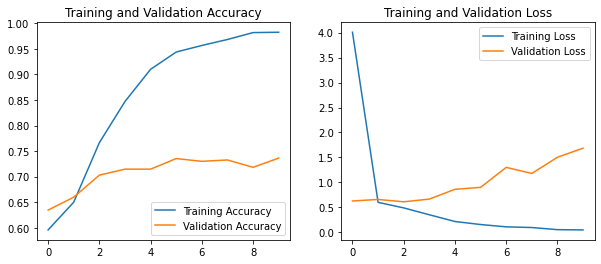

In [25]:
acc = M_8.history['accuracy']
val_acc = M_8.history['val_accuracy']

loss = M_8.history['loss']
val_loss = M_8.history['val_loss']

epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss');

In [31]:
model_9= Sequential()
model_9.add(InputLayer(input_shape=(128, 128,3)))
model_9.add(Conv2D(32, 3, activation='linear'))
model_9.add(LeakyReLU(alpha=0.1))
model_9.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_9.add(Conv2D(64, 3, activation='linear')) 
model_9.add(LeakyReLU(alpha=0.1))
model_9.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_9.add(Conv2D(128, 3, activation='linear')) 
model_9.add(LeakyReLU(alpha=0.1))
model_9.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_9.add(Flatten())
model_9.add(Dense(128, activation='linear'))
model_9.add(Dense(2 , activation = 'softmax'))  
model_9.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [32]:
M_9=model_9.fit(X_train, y_train, batch_size=70, epochs=10, validation_data=(X_val,y_val))

Epoch 1/10
64/64 [==============================] - 43s 663ms/step - loss: 39.8599 - accuracy: 0.6124 - val_loss: 1.6544 - val_accuracy: 0.7066
Epoch 2/10
64/64 [==============================] - 45s 699ms/step - loss: 0.8941 - accuracy: 0.7221 - val_loss: 0.9651 - val_accuracy: 0.6904
Epoch 3/10
64/64 [==============================] - 45s 699ms/step - loss: 0.5259 - accuracy: 0.8101 - val_loss: 1.2870 - val_accuracy: 0.6247
Epoch 4/10
64/64 [==============================] - 45s 700ms/step - loss: 0.4163 - accuracy: 0.8473 - val_loss: 0.6816 - val_accuracy: 0.7660
Epoch 5/10
64/64 [==============================] - 43s 674ms/step - loss: 0.2482 - accuracy: 0.9187 - val_loss: 0.6345 - val_accuracy: 0.7822
Epoch 6/10
64/64 [==============================] - 43s 676ms/step - loss: 0.1554 - accuracy: 0.9532 - val_loss: 0.6478 - val_accuracy: 0.7921
Epoch 7/10
64/64 [==============================] - 43s 672ms/step - loss: 0.1235 - accuracy: 0.9707 - val_loss: 0.6933 - val_accuracy: 0.783

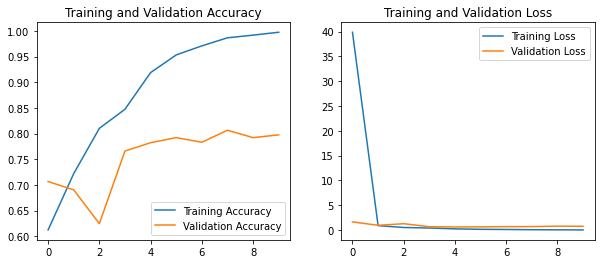

In [33]:
acc = M_9.history['accuracy']
val_acc = M_9.history['val_accuracy']

loss = M_9.history['loss']
val_loss = M_9.history['val_loss']

epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss');

In [34]:
model_10= Sequential()
model_10.add(InputLayer(input_shape=(128, 128,3)))
model_10.add(Conv2D(32, 3, activation='linear'))
model_10.add(LeakyReLU(alpha=0.1))
model_10.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_10.add(Conv2D(64, 3, activation='linear')) 
model_10.add(LeakyReLU(alpha=0.1))
model_10.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_10.add(Conv2D(128, 3, activation='linear')) 
model_10.add(LeakyReLU(alpha=0.1))
model_10.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_10.add(Flatten())
model_10.add(Dense(128, activation='linear'))
model_10.add(Dropout(.05))  
model_10.add(Dense(2 , activation = 'softmax'))  
model_10.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [35]:
M_10=model_10.fit(X_train, y_train, batch_size=70, epochs=10, validation_data=(X_val,y_val))

Epoch 1/10
64/64 [==============================] - 44s 669ms/step - loss: 53.5108 - accuracy: 0.6108 - val_loss: 2.3475 - val_accuracy: 0.6166
Epoch 2/10
64/64 [==============================] - 44s 691ms/step - loss: 1.0501 - accuracy: 0.7347 - val_loss: 1.1110 - val_accuracy: 0.6742
Epoch 3/10
64/64 [==============================] - 44s 690ms/step - loss: 0.6369 - accuracy: 0.7937 - val_loss: 0.7769 - val_accuracy: 0.7309
Epoch 4/10
64/64 [==============================] - 45s 702ms/step - loss: 0.3398 - accuracy: 0.8712 - val_loss: 0.7503 - val_accuracy: 0.7615
Epoch 5/10
64/64 [==============================] - 44s 681ms/step - loss: 0.2026 - accuracy: 0.9309 - val_loss: 0.7237 - val_accuracy: 0.7687
Epoch 6/10
64/64 [==============================] - 43s 677ms/step - loss: 0.1417 - accuracy: 0.9601 - val_loss: 0.7221 - val_accuracy: 0.7939
Epoch 7/10
64/64 [==============================] - 44s 689ms/step - loss: 0.0884 - accuracy: 0.9829 - val_loss: 0.7950 - val_accuracy: 0.795

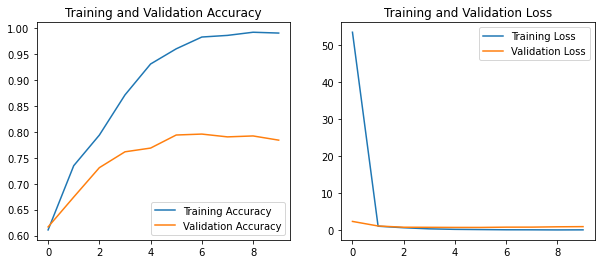

In [38]:
acc = M_10.history['accuracy']
val_acc = M_10.history['val_accuracy']

loss = M_10.history['loss']
val_loss = M_10.history['val_loss']

epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss');

In [41]:
model_11= Sequential()
model_11.add(InputLayer(input_shape=(128, 128,3)))
model_11.add(Conv2D(32, 3, activation='linear'))
model_11.add(LeakyReLU(alpha=0.1))
model_11.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_11.add(Conv2D(64, 3, activation='linear')) 
model_11.add(LeakyReLU(alpha=0.1))
model_11.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_11.add(Conv2D(128, 3, activation='linear')) 
model_11.add(LeakyReLU(alpha=0.1))
model_11.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_11.add(Flatten())
model_11.add(Dense(128, activation='linear'))
model_11.add(Dense(2 , activation = 'softmax'))  
model_11.compile(optimizer='Adagrad',loss="categorical_crossentropy",metrics=['accuracy'])

In [42]:
M_11=model_11.fit(X_train, y_train, batch_size=70, epochs=10, validation_data=(X_val,y_val))

Epoch 1/10
64/64 [==============================] - 43s 666ms/step - loss: 56.3327 - accuracy: 0.5953 - val_loss: 2.1285 - val_accuracy: 0.6670
Epoch 2/10
64/64 [==============================] - 44s 686ms/step - loss: 1.2922 - accuracy: 0.7347 - val_loss: 1.7766 - val_accuracy: 0.6913
Epoch 3/10
64/64 [==============================] - 44s 691ms/step - loss: 0.6164 - accuracy: 0.8149 - val_loss: 1.1879 - val_accuracy: 0.7435
Epoch 4/10
64/64 [==============================] - 43s 676ms/step - loss: 0.3756 - accuracy: 0.8664 - val_loss: 1.0957 - val_accuracy: 0.7336
Epoch 5/10
64/64 [==============================] - 43s 677ms/step - loss: 0.2443 - accuracy: 0.9054 - val_loss: 1.0771 - val_accuracy: 0.7444
Epoch 6/10
64/64 [==============================] - 45s 700ms/step - loss: 0.1601 - accuracy: 0.9428 - val_loss: 1.0002 - val_accuracy: 0.7588
Epoch 7/10
64/64 [==============================] - 44s 682ms/step - loss: 0.1122 - accuracy: 0.9660 - val_loss: 1.0169 - val_accuracy: 0.749

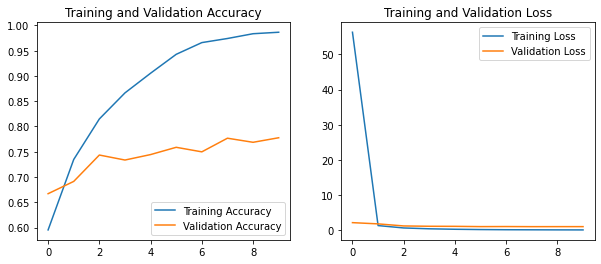

In [43]:
acc = M_11.history['accuracy']
val_acc = M_11.history['val_accuracy']

loss = M_11.history['loss']
val_loss = M_11.history['val_loss']

epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss');

In [44]:
model_12= Sequential()
model_12.add(InputLayer(input_shape=(128, 128,3)))
model_12.add(Conv2D(64, 3, activation='linear'))
model_12.add(LeakyReLU(alpha=0.1))
model_12.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_12.add(Conv2D(64, 3, activation='linear')) 
model_12.add(LeakyReLU(alpha=0.1))
model_12.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_12.add(Conv2D(64, 3, activation='linear')) 
model_12.add(LeakyReLU(alpha=0.1))
model_12.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_12.add(Flatten())
model_12.add(Dense(128, activation='linear'))
model_12.add(Dense(128, activation='linear'))
model_12.add(Dense(2 , activation = 'softmax'))  
model_12.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [45]:
M_12=model_12.fit(X_train, y_train, batch_size=70, epochs=10, validation_data=(X_val,y_val))

Epoch 1/10
64/64 [==============================] - 59s 909ms/step - loss: 36.7783 - accuracy: 0.5563 - val_loss: 0.6653 - val_accuracy: 0.6589
Epoch 2/10
64/64 [==============================] - 61s 955ms/step - loss: 0.5426 - accuracy: 0.7423 - val_loss: 0.5658 - val_accuracy: 0.7327
Epoch 3/10
64/64 [==============================] - 59s 921ms/step - loss: 0.4846 - accuracy: 0.7680 - val_loss: 0.7179 - val_accuracy: 0.6742
Epoch 4/10
64/64 [==============================] - 59s 924ms/step - loss: 0.4092 - accuracy: 0.8162 - val_loss: 0.6022 - val_accuracy: 0.7129
Epoch 5/10
64/64 [==============================] - 59s 920ms/step - loss: 0.3462 - accuracy: 0.8471 - val_loss: 0.5523 - val_accuracy: 0.7498
Epoch 6/10
64/64 [==============================] - 59s 923ms/step - loss: 0.2720 - accuracy: 0.8912 - val_loss: 0.5772 - val_accuracy: 0.7651
Epoch 7/10
64/64 [==============================] - 60s 943ms/step - loss: 0.2162 - accuracy: 0.9214 - val_loss: 0.5858 - val_accuracy: 0.757

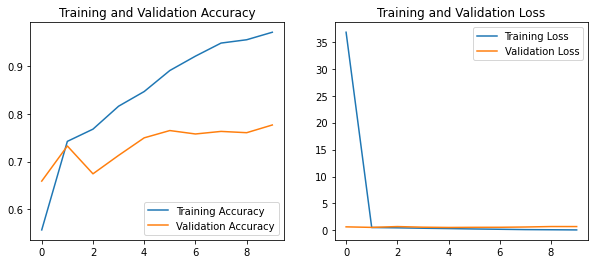

In [46]:
acc = M_12.history['accuracy']
val_acc = M_12.history['val_accuracy']

loss = M_12.history['loss']
val_loss = M_12.history['val_loss']

epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss');

In [47]:
model_13= Sequential()
model_13.add(InputLayer(input_shape=(128, 128,3)))
model_13.add(Conv2D(64, 3, activation='relu'))
model_13.add(LeakyReLU(alpha=0.1))
model_13.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_13.add(Conv2D(64, 3, activation='relu')) 
model_13.add(LeakyReLU(alpha=0.1))
model_13.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_13.add(Conv2D(64, 3, activation='relu')) 
model_13.add(LeakyReLU(alpha=0.1))
model_13.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model_13.add(Flatten())
model_13.add(Dense(128, activation='relu'))
model_13.add(Dense(128, activation='relu'))
model_13.add(Dense(2 , activation = 'softmax'))  
model_13.compile(optimizer='adam',loss="categorical_crossentropy",metrics=['accuracy'])

In [48]:
M_13=model_13.fit(X_train, y_train, batch_size=70, epochs=10, validation_data=(X_val,y_val))

Epoch 1/10
64/64 [==============================] - 60s 922ms/step - loss: 4.1359 - accuracy: 0.5971 - val_loss: 0.6179 - val_accuracy: 0.6625
Epoch 2/10
64/64 [==============================] - 60s 934ms/step - loss: 0.5316 - accuracy: 0.7336 - val_loss: 0.6461 - val_accuracy: 0.6940
Epoch 3/10
64/64 [==============================] - 60s 932ms/step - loss: 0.3994 - accuracy: 0.8187 - val_loss: 0.6539 - val_accuracy: 0.7165
Epoch 4/10
64/64 [==============================] - 67s 1s/step - loss: 0.2244 - accuracy: 0.9135 - val_loss: 0.7938 - val_accuracy: 0.7165
Epoch 5/10
64/64 [==============================] - 73s 1s/step - loss: 0.1627 - accuracy: 0.9394 - val_loss: 1.0265 - val_accuracy: 0.7372
Epoch 6/10
64/64 [==============================] - 70s 1s/step - loss: 0.1023 - accuracy: 0.9649 - val_loss: 1.1993 - val_accuracy: 0.7219
Epoch 7/10
64/64 [==============================] - 67s 1s/step - loss: 0.0925 - accuracy: 0.9689 - val_loss: 1.2192 - val_accuracy: 0.7318
Epoch 8/10


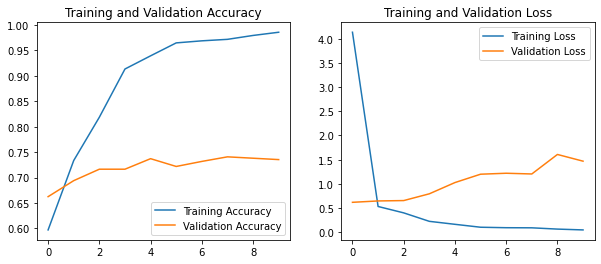

In [49]:
acc = M_13.history['accuracy']
val_acc = M_13.history['val_accuracy']

loss = M_13.history['loss']
val_loss = M_13.history['val_loss']

epochs=10
epochs_range = range(epochs)

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss');